In [2]:
import numpy

In [3]:
# Your code here
import sys
import numpy as np
import matplotlib

print(f"Python version: {sys.version}")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")

Python version: 3.11.14 | packaged by conda-forge | (main, Oct 22 2025, 22:35:28) [MSC v.1944 64 bit (AMD64)]
NumPy version: 1.26.4
Matplotlib version: 3.10.8


In [4]:
# Your code here
import os

base_dir = "assignment_01_output"
subdirs = [
    "data/raw",
    "data/processed",
    "figures",
    "src"
]

for subdir in subdirs:
    path = os.path.join(base_dir, subdir)
    os.makedirs(path, exist_ok=True)
    print(f"Created directory: {path}")

Created directory: assignment_01_output\data/raw
Created directory: assignment_01_output\data/processed
Created directory: assignment_01_output\figures
Created directory: assignment_01_output\src


In [5]:
# Your code here
import numpy as np

# Set the seed
np.random.seed(42)

# Generate random numbers
random_numbers = np.random.rand(5)
print(f"Random numbers: {random_numbers}")

Random numbers: [0.37454012 0.95071431 0.73199394 0.59865848 0.15601864]


C:\Users\User\miniconda3\envs\mse465\Lib\site-packages\rsciio\utils\rgb_tools.py:62: VisibleDeprecationWarning: The module `rsciio.utils.rgb_tools` has been renamed to `rsciio.utils.rgb` and it will be removed in version 1.0.
  warnings.warn(


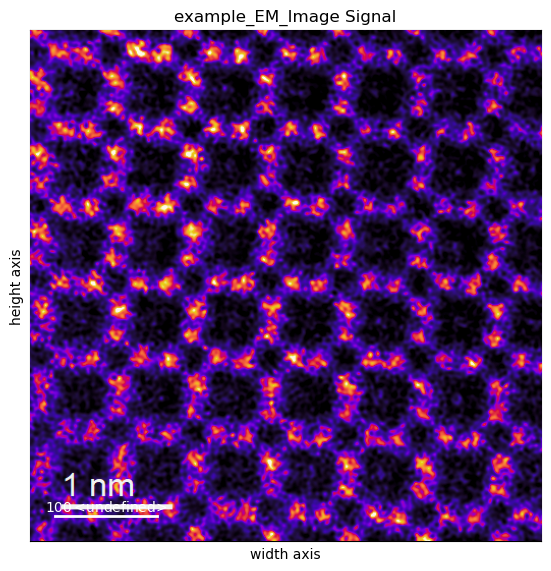

In [9]:
import hyperspy.api as hsa

s = hsa.load("example_EM_Image.tif")

s.plot()

In [11]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import io 
path = "example_EM_Image.tif"
img = io.imread(path)

print("dtype:", img.dtype)
print("shape:", img.shape)

if img.ndim == 2:
    img2d = img
elif img.ndim == 3:
    if img.shape[-1] in [3, 4]:
        img2d = img[..., :3].mean(axis=-1)
    else:
        img2d = img[img.shape[0] // 2, ...]
elif img.ndim == 4:
    z_mid = img.shape[0] // 2
    img2d = img[z_mid, ..., :3].mean(axis=-1)
else:
    raise ValueError(f"Unsupported image ndim: {img.ndim}")

img2d = img2d.astype(np.float64)

print("Using 2D image for analysis:", img2d.shape)

mean_intensity = img2d.mean()
std_intensity = img2d.std()
min_intensity = img2d.min()
max_intensity = img2d.max()

print(f"Mean intensity: {mean_intensity:.2f}")
print(f"Std intensity : {std_intensity:.2f}")
print(f"Min / Max     : {min_intensity:.2f} / {max_intensity:.2f}")

dtype: uint8
shape: (503, 503, 3)
Using 2D image for analysis: (503, 503)
Mean intensity: 59.01
Std intensity : 42.33
Min / Max     : 0.00 / 246.33


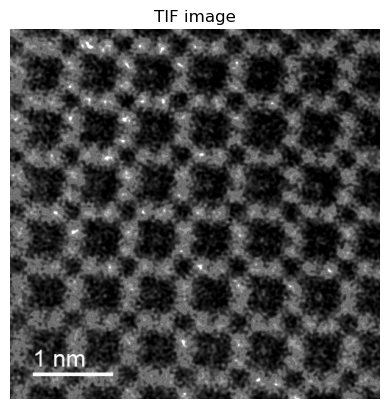

In [14]:
plt.figure()
plt.imshow(img2d, cmap="gray")
plt.title("TIF image")
plt.axis("off")
plt.show()

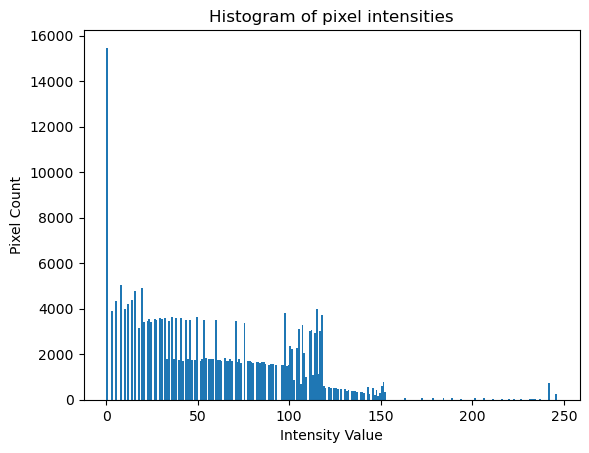

In [15]:
plt.figure()
plt.hist(img2d.ravel(), bins=256, range=(img2d.min(), img2d.max()))
plt.title("Histogram of pixel intensities")
plt.xlabel("Intensity Value")
plt.ylabel("Pixel Count")
plt.show()

# Observations 
## (from image statistics)
- Mean intensity is about 59.01; the overall image is quite dark. (Max is 255.)
- Standard intensity is about 42.33, which is large, meaning there are significant differences between bright and dark pixels.
- Min intensity is 0, meaning there are completely dark pixels.
- Max intensity is 246.33, meaning some pixels are pretty bright.

## (Observations of Histogram)
- There are approximately 15500 pixel counts on 0, which are completely dark pixels.
- Most pixels are in the range of (0,120): overall brightness is low. (as expected, mean=59.01) 
- Around 230 to 250 there are some pixel counts, meaning there are still some bright pixels in the image.

In [1]:
import sys
import platform

print("Python version:", sys.version)
print("Executable:", sys.executable)
print("OS:", platform.system(), platform.release())
print("Platform:", platform.platform())
print("Machine:", platform.machine())


Python version: 3.11.14 | packaged by conda-forge | (main, Oct 22 2025, 22:35:28) [MSC v.1944 64 bit (AMD64)]
Executable: C:\Users\User\miniconda3\envs\mse465\python.exe
OS: Windows 10
Platform: Windows-10-10.0.26200-SP0
Machine: AMD64


In [2]:
import importlib.metadata as md

packages = ["numpy", "scipy", "matplotlib", "hyperspy", "py4dstem"]

for p in packages:
    try:
        print(f"{p}: {md.version(p)}")
    except md.PackageNotFoundError:
        print(f"{p}: NOT INSTALLED")


numpy: 1.26.4
scipy: 1.16.3
matplotlib: 3.10.8
hyperspy: 2.3.0
py4dstem: 0.14.18


In [5]:
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt

import hyperspy.api as hs
import py4DSTEM

print("All core libraries imported successfully!")
print("NumPy:", np.__version__)
print("SciPy:", scipy.__version__)
print("Matplotlib:", matplotlib.__version__)
print("HyperSpy:", hs.__version__)
print("py4DSTEM:", py4DSTEM.__version__)


ImportError: DLL load failed while importing _C: 找不到指定的程序。